Let us import the necessary libraries.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree

from pomegranate import *

In [2]:
df = pd.read_csv("task10_dataset.csv")

In [3]:
df.head()

,IDINT,IDPAC,NrInt,Sex,VAn,VLu,VNorm,Jud,AnEx,LuEx,...,ULCER3,ULCER4,ULCER5,ULCER6,STOMUCCORP,STOMUCCORP2,STOMUCCORP3,STOMUCCORP4,STOMUCCORP5,STOMUCCORP6
0,2958,3,1,F,12,6,12.5,CJ,2006,1,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,3116,3,2,F,12,6,12.5,CJ,2006,5,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
2,2649,8,1,F,18,0,18.0,CJ,2005,1,...,NU,NaN,NaN,NaN,N,N,N,NaN,NaN,NaN
3,2813,8,2,F,18,0,18.0,CJ,2005,6,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
4,3718,8,3,F,18,0,18.0,CJ,2008,3,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN


In [4]:
classes = df.STOMUCCORP.unique()
classes

array(['N', 'NOD-ERI', 'HEMOR', 'ATROFIC', 'NODULAR', 'ERITEM', 'EROZIV',
       'HIPER', 'NOD-AT'], dtype=object)

In [5]:
columns = (df.columns).to_numpy()
columns

array(['IDINT', 'IDPAC', 'NrInt', 'Sex', 'VAn', 'VLu', 'VNorm', 'Jud',
       'AnEx', 'LuEx', 'SDA', 'SDA2', 'SDA3', 'SDA4', 'SDA5', 'SDA6',
       'SDE', 'SDE2', 'SDE3', 'SDE4', 'SDE5', 'SDE6', 'VAR', 'VAR2',
       'VAR3', 'VAR4', 'VAR5', 'VAR6', 'HIPO', 'HIPO2', 'HIPO3', 'HIPO4',
       'HIPO5', 'HIPO6', 'ANEMIE', 'ANEMIE2', 'ANEMIE3', 'ANEMIE4',
       'ANEMIE5', 'ANEMIE6', 'AA', 'AA2', 'AA3', 'AA4', 'AA5', 'AA6',
       'HDSI', 'HDSI2', 'HDSI3', 'HDSI4', 'HDSI5', 'HDSI6', 'GAS', 'GAS2',
       'GAS3', 'GAS4', 'GAS5', 'GAS6', 'GASHP', 'GASHP2', 'GASHP3',
       'GASHP4', 'GASHP5', 'GASHP6', 'ESOFAGITA', 'ESOFAGITA2',
       'ESOFAGITA3', 'ESOFAGITA4', 'ESOFAGITA5', 'ESOFAGITA6', 'ANO',
       'ANO2', 'ANO3', 'ANO4', 'ANO5', 'ANO6', 'BC', 'BC2', 'BC3', 'BC4',
       'BC5', 'BC6', 'CEFALEE', 'CEFALEE2', 'CEFALEE3', 'CEFALEE4',
       'CEFALEE5', 'CEFALEE6', 'CONS', 'CONS2', 'CONS3', 'CONS4', 'CONS5',
       'CONS6', 'DRE', 'DRE2', 'DRE3', 'DRE4', 'DRE5', 'DRE6', 'ULCER',
       'ULCE

These are the columns we will work with, but they include data from multiple consults. Let us only keep the data from the first consult.

In [6]:
no_consultations = 6
first_symptom_index = np.where(columns == "SDA")[0][0]
no_consultations, first_symptom_index

(6, 10)

In [7]:
patient_data = columns[1:10]
useless = ['Sex', 'VNorm', 'NrInt','IDPAC', 'VAn', 'VLu', 'Jud', 'AnEx', 'LuEx']
for elem in useless:
    patient_data = patient_data[patient_data != elem]
patient_data

array([], dtype=object)

In [8]:
consults = np.empty([6, 17], dtype=object)

consults[0].shape

(17,)

The consults array keeps the corresponding columns for all the consults. We will only use the first consult data in this model.

In [9]:
consults = np.empty([6, 17], dtype=object)
for i in range(0, 6):
    cons_i = []
    for pos, val in enumerate(columns):
        if pos >= first_symptom_index and ((pos - first_symptom_index) % no_consultations == i):
            cons_i = np.append(cons_i, val)
    consults[i] = cons_i
print(consults[0])

['SDA' 'SDE' 'VAR' 'HIPO' 'ANEMIE' 'AA' 'HDSI' 'GAS' 'GASHP' 'ESOFAGITA'
 'ANO' 'BC' 'CEFALEE' 'CONS' 'DRE' 'ULCER' 'STOMUCCORP']


In [10]:
first_consult = np.append(patient_data, consults[0])
first_consult

array(['SDA', 'SDE', 'VAR', 'HIPO', 'ANEMIE', 'AA', 'HDSI', 'GAS',
       'GASHP', 'ESOFAGITA', 'ANO', 'BC', 'CEFALEE', 'CONS', 'DRE',
       'ULCER', 'STOMUCCORP'], dtype=object)

In [11]:
first_df = df[first_consult]
first_x = first_df.iloc[:,:-1]   # features - everything but the label
first_y = first_df.iloc[:,-1:]   # label - last column

Let us now encode the data, in order to train a decision tree classifier. I have decided to assemble such a classifier in order to make a comparision between this model and my Naive Bayes Classifier model.

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
first_df_encoded = first_df.apply(le.fit_transform)
first_df_encoded

,SDA,SDE,VAR,HIPO,ANEMIE,AA,HDSI,GAS,GASHP,ESOFAGITA,ANO,BC,CEFALEE,CONS,DRE,ULCER,STOMUCCORP
0,1,0,1,0,1,1,2,1,1,1,1,1,1,1,1,0,5
1,1,1,1,0,1,1,2,1,1,1,1,1,1,1,1,0,5
2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,0,5
3,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,0,5
4,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1,0,1,1,1,1,2,1,1,1,1,1,1,1,1,0,5
495,1,1,1,0,1,1,2,1,1,1,0,1,1,1,1,0,5
496,1,1,1,1,1,1,2,0,1,1,0,1,1,1,1,0,0
497,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,0,5


In [13]:
first_x_encoded = first_df_encoded.iloc[:,:-1]   # features - everything but the label
first_y_encoded = first_df_encoded.iloc[:,-1:]   # label - last column

In [14]:
first_x_encoded

,SDA,SDE,VAR,HIPO,ANEMIE,AA,HDSI,GAS,GASHP,ESOFAGITA,ANO,BC,CEFALEE,CONS,DRE,ULCER
0,1,0,1,0,1,1,2,1,1,1,1,1,1,1,1,0
1,1,1,1,0,1,1,2,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1,0,1,1,1,1,2,1,1,1,1,1,1,1,1,0
495,1,1,1,0,1,1,2,1,1,1,0,1,1,1,1,0
496,1,1,1,1,1,1,2,0,1,1,0,1,1,1,1,0
497,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,0


In [15]:
first_y_encoded

,STOMUCCORP
0,5
1,5
2,5
3,5
4,5
...,...
494,5
495,5
496,0
497,5


In [16]:
print(first_x_encoded.shape, " ", first_y_encoded.shape)

(499, 16)   (499, 1)


In [17]:
train_x, test_x, train_y, test_y = train_test_split(first_x_encoded, first_y_encoded, test_size=0.25, random_state=42)

# I tried to stratify the train/test sets using first_y, but there was only one member for a certain class
# thus the stratification was impossible (sklearn threw an error)

In [18]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=14)

In [19]:
clf.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', random_state=14)

In [20]:
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=first_x.columns,
                                class_names=classes,
                                filled=True,
                                rounded=True)
graph = graphviz.Source(dot_data)

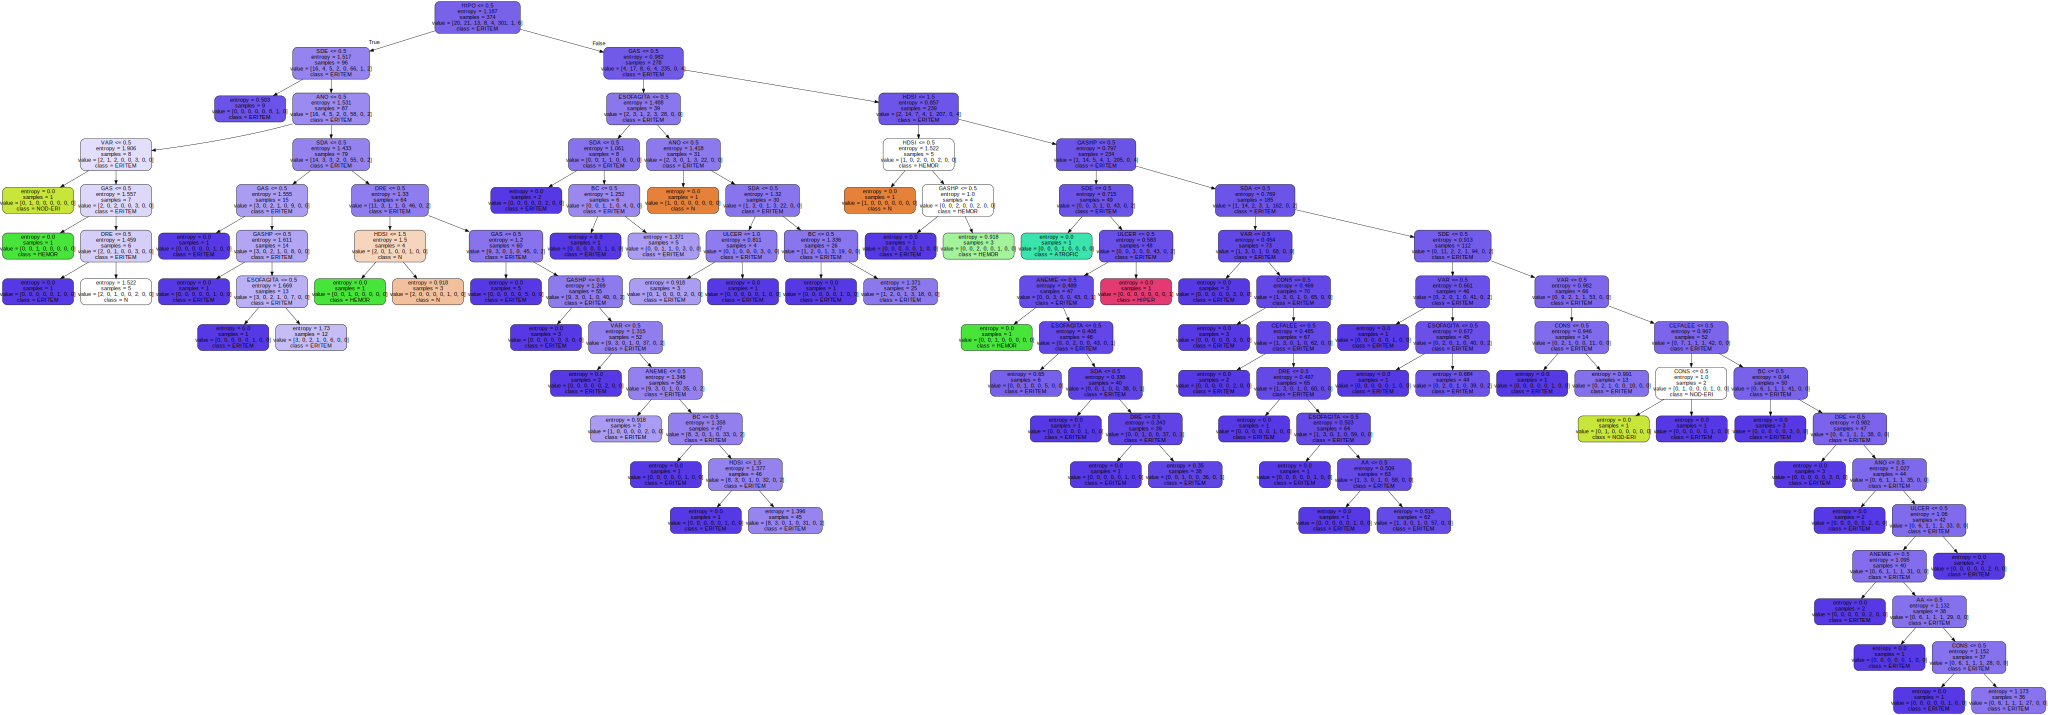

In [21]:
graph

In [22]:
clf.score(test_x, test_y)

0.712

As we can see, this classifier has an embarassing accuracy score. Moreover, the decision tree is rather large, occupying a lot of space and memory. Can we build a better, more efficient Bayesian model given the data?

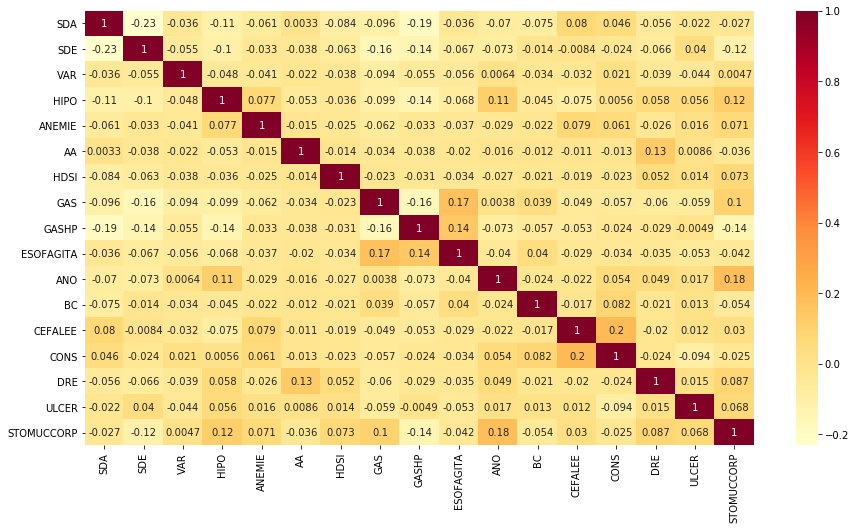

In [23]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(first_df_encoded.corr(), cmap ='YlOrRd', annot = True)  # Wistia is also a good colour map
plt.show()

In [24]:
first_df_encoded.corr()['STOMUCCORP'].abs().sort_values().tail()

SDE           0.115106
HIPO          0.121831
GASHP         0.143644
ANO           0.182798
STOMUCCORP    1.000000
Name: STOMUCCORP, dtype: float64

This correlation matrix reveals the fact that the features are badly correlated to the label. This means that it is very hard for a classifier to make good decisions. We should not be surprised if our model accuracies will be bad.

Let us build a Naive Bayesian Classifier.

In [25]:
train_x, test_x, train_y, test_y = train_test_split(first_x, first_y, test_size=0.25, random_state=44)


The way I have decided to build my Bayesian Network, I only have to compute probability tables for conditionally independent variables (label values), and conditionally dependent variables which are only dependent on one other variable (all features are dependent on the label).

In [26]:
# returns an unconditional prob. distribution for the <column> column values

def calc_independent_probability(df, column):         
    val_counts = df[column].value_counts().to_dict()
    total_cases = len(df[column])
    dict = {k: v / total_cases for k, v in val_counts.items()}
    return dict

In [27]:
# returns a conditional prob. distribution for the <query> column variables, dependent on <evidence> variables,
# having an <evprob> independent probability distribution

def calc_probability_table(df, query, evidence, evprob):
    prob_table = []
    total_cases = len(df[evidence])
    dict = df.groupby([query, evidence]).size()
    for q_val in df[query].unique():
        for e_val in df[evidence].unique():
            if (q_val, e_val) in dict.index:
                proba = dict[(q_val, e_val)] / total_cases / evprob[e_val]
            else: 
                proba = 0
            prob_table.append([e_val, q_val, proba])
    return prob_table
        

Here, we can see the probability distribution for all the values of the STOMUCCORP column.

In [28]:
smc_dict = calc_independent_probability(train_y, 'STOMUCCORP')
smc_dict

{'N': 0.7914438502673797,
 'ERITEM': 0.06149732620320856,
 'ATROFIC': 0.0481283422459893,
 'HEMOR': 0.034759358288770054,
 'EROZIV': 0.029411764705882353,
 'NODULAR': 0.016042780748663103,
 'HIPER': 0.013368983957219251,
 'NOD-ERI': 0.00267379679144385,
 'NOD-AT': 0.00267379679144385}

In [29]:
train = train_x.join(train_y)

In [30]:
sda_table = calc_probability_table(train, 'SDA', 'STOMUCCORP', smc_dict)
sda_table

[['N', 'NU', 0.7466216216216216],
 ['ATROFIC', 'NU', 0.8333333333333334],
 ['NOD-ERI', 'NU', 1.0],
 ['ERITEM', 'NU', 0.8695652173913043],
 ['HEMOR', 'NU', 0.8461538461538461],
 ['EROZIV', 'NU', 0.8181818181818181],
 ['HIPER', 'NU', 1.0],
 ['NODULAR', 'NU', 1.0],
 ['NOD-AT', 'NU', 1.0],
 ['N', 'DA', 0.25337837837837834],
 ['ATROFIC', 'DA', 0.16666666666666669],
 ['NOD-ERI', 'DA', 0],
 ['ERITEM', 'DA', 0.13043478260869565],
 ['HEMOR', 'DA', 0.15384615384615383],
 ['EROZIV', 'DA', 0.18181818181818182],
 ['HIPER', 'DA', 0],
 ['NODULAR', 'DA', 0],
 ['NOD-AT', 'DA', 0]]

In [31]:
stomuccorp = DiscreteDistribution(smc_dict)

In [50]:
feature_tab = {}
for feature in train_x.columns:
    feature_tab[feature] = ConditionalProbabilityTable(
                        calc_probability_table(train, feature, 'STOMUCCORP', smc_dict), 
                        [stomuccorp])
feature_tab['SDA']

{
    "class" : "Distribution",
    "name" : "ConditionalProbabilityTable",
    "table" : [
        [
            "N",
            "NU",
            "0.7466216216216216"
        ],
        [
            "ATROFIC",
            "NU",
            "0.8333333333333334"
        ],
        [
            "NOD-ERI",
            "NU",
            "1.0"
        ],
        [
            "ERITEM",
            "NU",
            "0.8695652173913043"
        ],
        [
            "HEMOR",
            "NU",
            "0.8461538461538461"
        ],
        [
            "EROZIV",
            "NU",
            "0.8181818181818181"
        ],
        [
            "HIPER",
            "NU",
            "1.0"
        ],
        [
            "NODULAR",
            "NU",
            "1.0"
        ],
        [
            "NOD-AT",
            "NU",
            "1.0"
        ],
        [
            "N",
            "DA",
            "0.25337837837837834"
        ],
        [
            "ATROFIC",
   

Let us assemble the Bayesian Classifier, adding the states and the edges.

In [33]:
smc_st = State(stomuccorp, name="StoMucCorp")
feature_states = []
for name, tab in feature_tab.items():
    state = State(tab, name=name)
    feature_states.append(state)

In [34]:
model = BayesianNetwork("StoMucCorp Prediction")
model.add_state(smc_st)
for st in feature_states:
    model.add_state(st)

for st in feature_states:
    model.add_edge(smc_st, st)


In [35]:
model.bake()

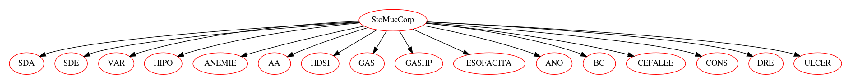

In [36]:
model.plot()

On a first glance over the dataset, one would build the Bayes Network with the arcs reversed, compared to my architecture. However, this would mean computing approximately (number of values for StoMucCorp) * 2^(number of symptoms) probability values. The way I have built the network, I have to compute 2 * (number of symptoms) + (number of values for StoMucCorp). Less probabilities and they are much less complicated as well. It was possible for me to build the network this way thanks to Bayes' conditional probability rule, which establishes a formula between P(A|B) and P(B|A).

Now, The model is ready to be queried and evaluated on the test subset.

In [37]:
test = test_x.join(test_y)
len(test)

125

In [38]:
def accuracy(model, test):
    accuracy = 0
    for index, row in test.iterrows():
        test_input = (row[:-1]).to_dict()
        predict = model.predict_proba(test_input)[0].mle()
        label = row[-1:]['STOMUCCORP']
        if predict == label:
            accuracy = accuracy + 1
    accuracy = accuracy / len(test)
    return accuracy

In [39]:
accuracy(model, test)

0.784

The accuracy is better than for the decision tree classifier, but not by much. This is still a bad model accuracy, but part of this is because of the nature of the dataset. This model was (probably) easier to compute, therefore it is the better option in this case.

In [40]:
def confusion_matrix(model, test_data, value):
    TP = TN = FP = FN = 0
    for index, row in test.iterrows():
        test_input = (row[:-1]).to_dict()
        predict = model.predict_proba(test_input)[0].mle()
        label = row[-1:]['STOMUCCORP']
        
        if predict == label and label == value:
            TP = TP + 1
        elif predict == label and label != value:
            TN = TN + 1
        elif label == value and predict != label:
            FN = FN + 1
        elif label != value and predict == label:
            FP = FP + 1
    return {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}

In [41]:
def specificity(confusion_matrix):
    return confusion_matrix['TN'] / (confusion_matrix['TN'] + confusion_matrix['FP'])

In [42]:
def sensitivity(confusion_matrix):
    return confusion_matrix['TP'] / (confusion_matrix['TP'] + confusion_matrix['FN'])

In [43]:
confusion_matrix(model, test, 'ATROFIC')

{'TP': 1, 'TN': 97, 'FP': 0, 'FN': 7}

In [44]:
specificity(confusion_matrix(model, test, 'ATROFIC'))

1.0

In [45]:
sensitivity(confusion_matrix(model, test, 'ATROFIC'))

0.125

In [46]:
performance = {}
for val in test.STOMUCCORP.unique():
    conf = confusion_matrix(model, test, val)
    spec = specificity(conf)
    sens = sensitivity(conf)
    
    performance[val] = [("Specificity: ", spec), (" Sensitivity: ", sens)]
performance

{'ATROFIC': [('Specificity: ', 1.0), (' Sensitivity: ', 0.125)],
 'N': [('Specificity: ', 1.0), (' Sensitivity: ', 0.9897959183673469)],
 'NODULAR': [('Specificity: ', 1.0), (' Sensitivity: ', 0.0)],
 'EROZIV': [('Specificity: ', 1.0), (' Sensitivity: ', 0.0)],
 'ERITEM': [('Specificity: ', 1.0), (' Sensitivity: ', 0.0)],
 'NOD-AT': [('Specificity: ', 1.0), (' Sensitivity: ', 0.0)],
 'HEMOR': [('Specificity: ', 1.0), (' Sensitivity: ', 0.0)]}

We can study the specificity and sensitivity values and deduce the reason for the model's good accuracy. Given the fact that the number of StoMucCorp = 'N' rows is rather large, the model was able to predict these values quite easily (with a sensitivity of 0.98). However, on other values for StoMucCorp, the model failed miserably. The specificity is still 100%, because False Positives are 0 for most of the column values.

Given the trained Bayesian model, we can query it, giving it only a subset of values.

In [47]:
train

,SDA,SDE,VAR,HIPO,ANEMIE,AA,HDSI,GAS,GASHP,ESOFAGITA,ANO,BC,CEFALEE,CONS,DRE,ULCER,STOMUCCORP
438,NU,NU,NU,NU,DA,NU,NU,NU,NU,NU,NU,NU,NU,NU,NU,NU,N
308,NU,NU,NU,NU,NU,NU,NU,NU,DA,NU,NU,NU,NU,NU,NU,NU,N
237,NU,NU,NU,DA,NU,NU,NU,NU,DA,NU,NU,NU,NU,DA,NU,NU,N
290,NU,NU,NU,NU,NU,NU,NU,DA,NU,NU,NU,NU,NU,NU,NU,NU,N
33,DA,NU,NU,NU,NU,NU,NU,DA,NU,NU,NU,NU,NU,NU,NU,NU,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,NU,NU,NU,NU,NU,NU,NU,NU,DA,NU,NU,NU,NU,NU,NU,NU,N
173,NU,NU,NU,NU,NU,NU,NU,NU,NU,NU,NU,NU,NU,NU,NU,NU,N
241,NU,NU,NU,NU,NU,NU,NU,DA,NU,NU,NU,NU,NU,NU,NU,NU,N
419,NU,NU,NU,NU,NU,NU,NU,NU,DA,NU,NU,NU,NU,NU,NU,NU,N


We can try to predict the value of STOMUCCORP (or any other symptom) based on a subset of observed symptoms.

In [60]:
print(model.predict_proba({'ANEMIE' : 'NU', 'ULCER' : 'NU'})[0].mle())

print(test.groupby(['ANEMIE', 'ULCER', 'STOMUCCORP']).size())


N
ANEMIE  ULCER  STOMUCCORP
DA      NU     ATROFIC        1
               ERITEM         1
               N              4
NU      NU     ATROFIC        7
               ERITEM         7
               EROZIV         6
               HEMOR          2
               N             91
               NOD-AT         1
               NODULAR        1
        UG     N              2
               NODULAR        1
        UGD    N              1
dtype: int64


We can also see the probability distribution for the STOMUCCORP label. .mle() just chooses the key with maximum probability.

In [66]:
model.predict_proba({'ANEMIE' : 'NU', 'ULCER' : 'NU'})[0].parameters

[{'N': 0.7923593099565025,
  'ERITEM': 0.06283862988157943,
  'ATROFIC': 0.046445943825516194,
  'HEMOR': 0.035517486454807415,
  'EROZIV': 0.027321143426775645,
  'NODULAR': 0.01639268605606701,
  'HIPER': 0.01366057171338982,
  'NOD-ERI': 0.002732114342681014,
  'NOD-AT': 0.002732114342681014}]

In [68]:
print(test.groupby(['STOMUCCORP']).size())

STOMUCCORP
ATROFIC     8
ERITEM      8
EROZIV      6
HEMOR       2
N          98
NOD-AT      1
NODULAR     2
dtype: int64


The non-uniform distribution of values of the label data should give us a good idea as to why our model does not perform very well. Whereas it classifies the 'N' rows pretty well, it really struggles with the other classes. This is also because the features and label are hardly correlated, as we have seen earlier.